In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

<AxesSubplot:ylabel='Density'>

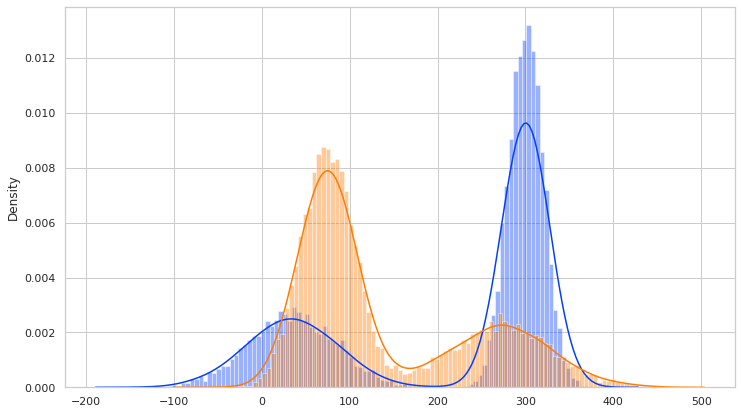

In [4]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
value2 =  np.random.normal(loc=300,scale=20,size=10000)
q1 = np.concatenate((value1,value2))
value1 = np.random.normal(loc=270,scale=60,size=5000)
value2 =  np.random.normal(loc=75,scale=30,size=10000)
q2 = np.concatenate((value1,value2))
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)

In [5]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm

In [6]:
print(best_gmmq1.get_params())
print(best_gmmq1.get_params())

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [7]:
print(best_gmmq1.means_)
print(best_gmmq2.means_)
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)

[[ 34.36252567]
 [300.04340106]]
[[272.25874282]
 [ 75.06318767]]
[0.33332858 0.66667142]
[0.32922962 0.67077038]


## OrderbyMeans

In [8]:
means=[]
for i in range(len(best_gmmq1.means_)):
    means.append(best_gmmq1.means_[i][0])
x = dict(zip(means,best_gmmq1.weights_))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1

OrderedDict([(300.04340106175016, 0.6666714159661873),
             (34.362525668641766, 0.3333285840338131)])

In [9]:
means=[]
for i in range(len(best_gmmq2.means_)):
    means.append(best_gmmq2.means_[i][0])
x = dict(zip(means,best_gmmq2.weights_))
od2 = collections.OrderedDict(sorted(x.items(),reverse=True))
od2

OrderedDict([(272.25874282362764, 0.32922962293822033),
             (75.06318767078143, 0.6707703770617822)])

## OrderbyWeights

In [10]:
means=[]
for i in range(len(best_gmmq1.means_)):
    means.append(best_gmmq1.means_[i][0])
x = dict(zip(best_gmmq1.weights_,means))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1 = list(zip(list(od1.keys()),list(od1.values())))
od1

[(0.6666714159661873, 300.04340106175016),
 (0.3333285840338131, 34.362525668641766)]

In [11]:
means=[]
for i in range(len(best_gmmq2.means_)):
    means.append(best_gmmq2.means_[i][0])
y = dict(zip(best_gmmq2.weights_,means))
od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
od2 = list(zip(list(od2.keys()),list(od2.values())))
od2

[(0.6707703770617822, 75.06318767078143),
 (0.32922962293822033, 272.25874282362764)]

In [12]:
thres = 0.05
diffmean = []
diffweights = []
for i in range(len(od1)):
    diffmean.append(od1[i][1] - od2[i][1])
    diffweights.append(od1[i][0] - od2[i][0])        

In [13]:
print(diffmean)
print(diffweights)

[224.98021339096874, -237.8962171549859]
[-0.004098961095594933, 0.004098961095592768]
